# Laboratório 4: Caso Limitado 

### Referente ao capítulo 9

Vamos reexaminar o primeiro laboratório, mas com inclusão de limites inferior e superior para o controle. 

$$\begin{equation}
    \max_u \int_0^1 Ax(t) - u(t)^2 dt \\
    s.a ~ x'(t) = -\frac{1}{2}x(t)^2 + Cu(t), x(0) = x_0 > -2, \\
    M_1 \leq u(t) \leq M_2, A \geq 0
\end{equation}$$

## Condições Necessárias 

### Hamiltoniano

$$
H = Ax - u^2 + \lambda\left(-\frac{1}{2}x(t)^2 + Cu(t)\right)
$$

### Equação adjunta 

$$
\lambda '(t) = - H_x = -A + \lambda(t)x(t)
$$

### Condição de transversalidade 

$$
\lambda(T) = 0
$$

### Condição de otimalidade

$$
H_u = -2u + C\lambda 
$$
Assim, 

$H_u < 0 \implies u^*(t) = M_1 \implies \frac{C}{2}\lambda < M_1$

$H_u > 0 \implies u^*(t) = M_2 \implies \frac{C}{2}\lambda > M_2$

$H_u = 0 \implies M_1 \le u^*(t) = \frac{C}{2}\lambda \le M_2$

Portanto $u^*(t) = \min\left(M_2, \max\left(M_1, \frac{C}{2}\lambda(t)\right)\right)$

### Importanto as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import sys  
sys.path.insert(0, '../pyscripts/')

from optimal_control_class import OptimalControl

Precisamos definir a função que atualiza $u^*$ segundo a expressão acima mensionada, pontualmente. 

In [2]:
parameters = {'A': None, 'C': None, 'M1': None, 'M2': None}

diff_state = lambda t, x, u, par: -0.5*x**2 + par['C']*u
diff_lambda = lambda t, x, u, lambda_, par: -par['A'] + lambda_*x 
update_u = lambda t, x, lambda_, par: np.minimum(par['M2'], np.maximum(par['M1'], 0.5*par['C']*lambda_))

## Aplicando a classe ao exemplo 

Vamos fazer algumas exeperimentações. Sinta-se livre para variar os parâmetros. Os limites podem ser passados de duas formas. Como parâmetro padrão do problema ou como parâmetro, passando dentro do método `solve`.  

In [3]:
problem = OptimalControl(diff_state, diff_lambda, update_u)

In [4]:
x0 = 1
T = 1
parameters['A'] = 1
parameters['C'] = 4
parameters['M1'] = -1
parameters['M2'] = 2

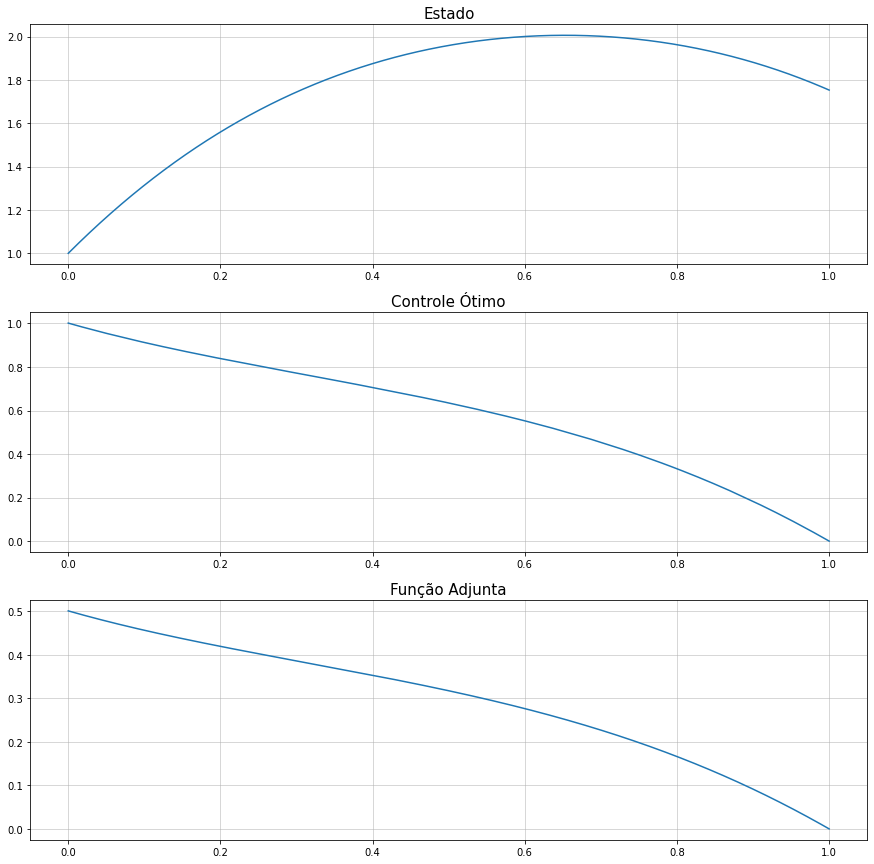

In [5]:
t,x,u,lambda_ = problem.solve(x0, T, parameters, bounds = [(parameters['M1'], parameters['M2'])])
ax = problem.plotting(t,x,u,lambda_)

Observe que o resultado é equivalente àquele do laboratório 1. Se a solução ótimo do problema está entre os limites que definimos, como foi o caso, a solução permanece a mesma, como era esperado. Agora, se definirmos um limite menor que o máximo do controle ótimo, a solução deve mudar. 

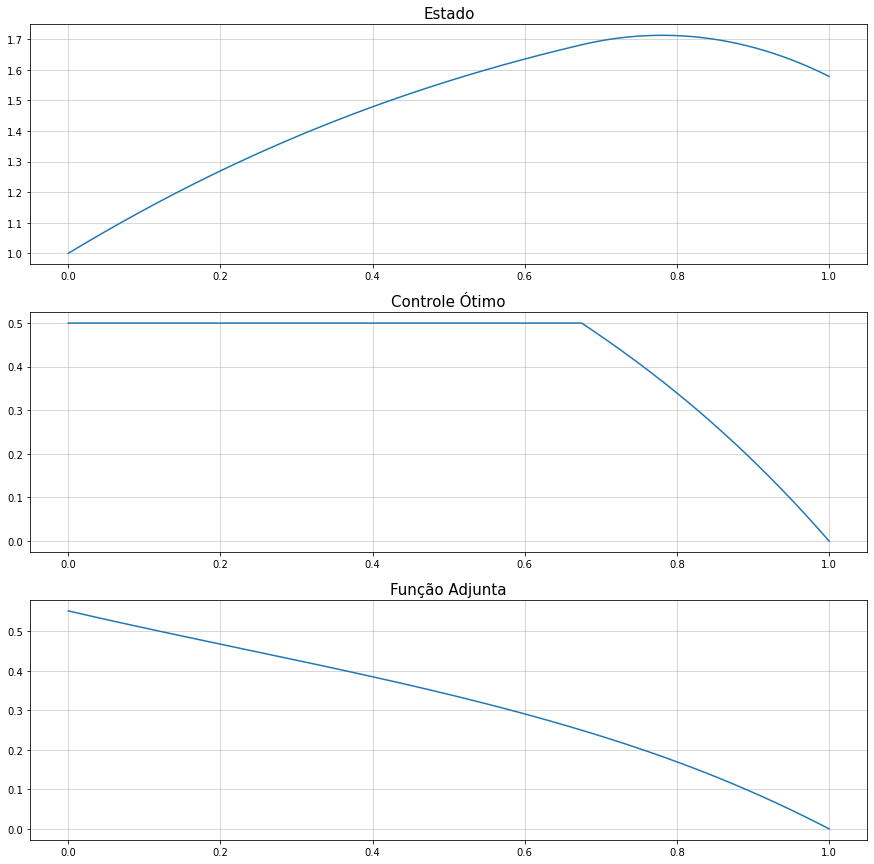

In [6]:
parameters['M2'] = 0.5 
t,x,u,lambda_ = problem.solve(x0, T, parameters, bounds = [(parameters['M1'], parameters['M2'])])
ax = problem.plotting(t,x,u,lambda_)

Observe que o controle ótimo ficou diferente, inclusive em todo o intervalo e, em particular, fica em seu máximo uma boa parcela do tempo. Também podemos fazer o mesmo com o limite inferior. 

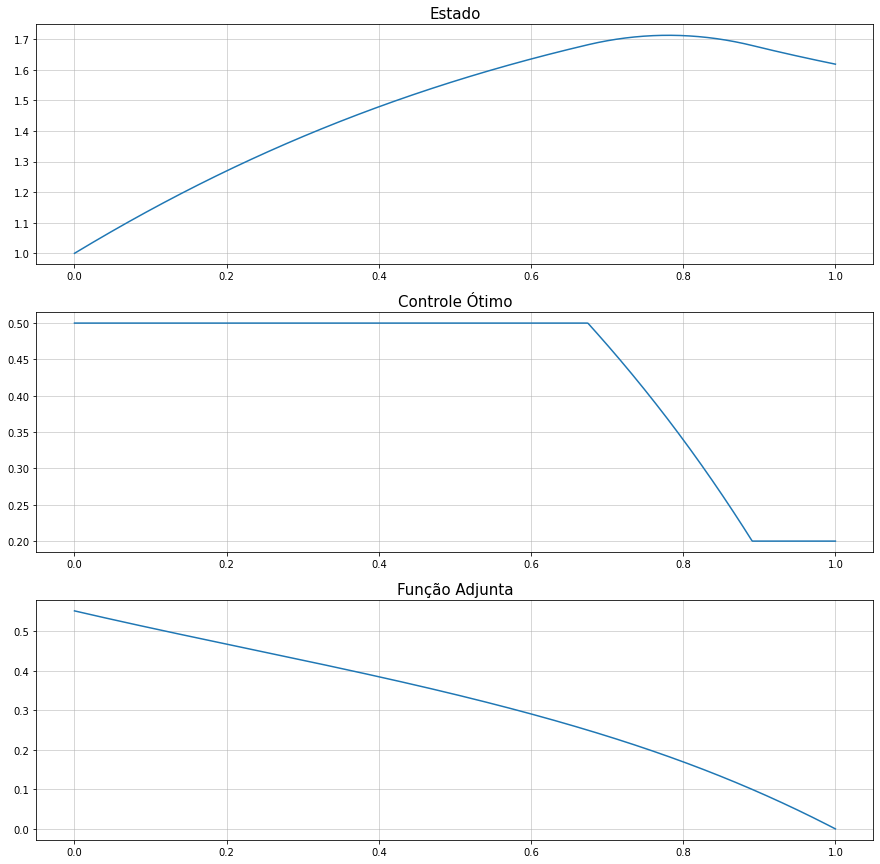

In [7]:
parameters['M1'] = 0.2 
t,x,u,lambda_ = problem.solve(x0, T, parameters, bounds = [(parameters['M1'], parameters['M2'])])
ax = problem.plotting(t,x,u,lambda_)